# The Series Data Structure

In [1]:
import pandas as pd
pd.Series?

Init signature:
pd.Series(
    data=None,
    index=None,
    dtype: 'Dtype | None' = None,
    name=None,
    copy: 'bool' = False,
    fastpath: 'bool' = False,
)
Docstring:     
One-dimensional ndarray with axis labels (including time series).

Labels need not be unique but must be a hashable type. The object
supports both integer- and label-based indexing and provides a host of
methods for performing operations involving the index. Statistical
methods from ndarray have been overridden to automatically exclude
missing data (currently represented as NaN).

Operations between Series (+, -, /, *, **) align values based on their
associated index values-- they need not be the same length. The result
index will be the sorted union of the two indexes.

Parameters
----------
data : array-like, Iterable, dict, or scalar value
    Contains data stored in Series. If data is a dict, argument order is
    maintained.
index : array-like or Index (1d)
    Values must be hashable and have the same 

A pandas series can be constructed by passing a list of items of the same type

In [2]:
animals = ['Tiger', 'Bear', 'Moose']
pd.Series(animals)

0    Tiger
1     Bear
2    Moose
dtype: object

In [3]:
numbers = [1, 2, 3]
pd.Series(numbers)

0    1
1    2
2    3
dtype: int64

To specify your own index, you can also pass a dictionnary

In [4]:
s = pd.Series([100.00, 120.00, 101.00, 3.00])
print(s.sum())
print(s.max())
print ('sum= {}, mean= {}, max= {}, min= {}'.format(s.sum(), s.mean(), s.max(), s.min()))

324.0
120.0
sum= 324.0, mean= 81.0, max= 120.0, min= 3.0


In [5]:
sports = {'Archery': 'Bhutan',
          'Golf': 'Scotland',
          'Sumo': 'Japan',
          'Taekwondo': 'South Korea'}
s = pd.Series(sports)
s

Archery           Bhutan
Golf            Scotland
Sumo               Japan
Taekwondo    South Korea
dtype: object

# Querying a Series

In [6]:
s.iloc[3]  # iloc with an integer representing the position of the index

'South Korea'

In [7]:
s.loc['Taekwondo']  # loc with the label of the index (always tring ??)

'South Korea'

In [8]:
s[3]

'South Korea'

In [9]:
s['Taekwondo']

'South Korea'

# The DataFrame Data Structure
A pandas dataframe can be constructed by passing a list of pandas series

In [21]:
import pandas as pd
purchase_1 = pd.Series({'Name': 'Chris',
                        'Item Purchased': 'Dog Food',
                        'Cost': 22.50})
purchase_2 = pd.Series({'Name': 'Kevyn',
                        'Item Purchased': 'Kitty Litter',
                        'Cost': 2.50})
purchase_3 = pd.Series({'Name': 'Vinod',
                        'Item Purchased': 'Bird Seed',
                        'Cost': 5.00}) 
df = pd.DataFrame([purchase_1, purchase_2, purchase_3], index=['Store 1', 'Store 2', 'Store 3']) 
df.head()

,Name,Item Purchased,Cost
Store 1,Chris,Dog Food,22.5
Store 2,Kevyn,Kitty Litter,2.5
Store 3,Vinod,Bird Seed,5.0


In [11]:
df.loc['Store 2']

Name                     Kevyn
Item Purchased    Kitty Litter
Cost                       2.5
Name: Store 2, dtype: object

In [12]:
type(df.loc['Store 2'])

pandas.core.series.Series

In [13]:
df.loc['Store 1']

Name                 Chris
Item Purchased    Dog Food
Cost                  22.5
Name: Store 1, dtype: object

In [14]:
df.loc['Store 1', 'Cost']

22.5

In [15]:
df.loc['Store 2']['Cost']

2.5

In [16]:
df['Cost']

Store 1    22.5
Store 2     2.5
Store 3     5.0
Name: Cost, dtype: float64

In [17]:
df['Cost'] = df.Cost + 2
df.Cost

Store 1    24.5
Store 2     4.5
Store 3     7.0
Name: Cost, dtype: float64

In [18]:
df.loc[:,['Name', 'Item Purchased', 'Cost']]

,Name,Item Purchased,Cost
Store 1,Chris,Dog Food,24.5
Store 2,Kevyn,Kitty Litter,4.5
Store 3,Vinod,Bird Seed,7.0


In [19]:
df.drop('Store 1', inplace = True)

In [20]:
df

,Name,Item Purchased,Cost
Store 2,Kevyn,Kitty Litter,4.5
Store 3,Vinod,Bird Seed,7.0


# Dataframe Indexing and Loading
Let's play with the All-time Olympic Games medal table from wikipedia: https://en.wikipedia.org/w/index.php?title=All-time_Olympic_Games_medal_table&oldid=697531834

In [22]:
df = pd.read_csv('olympics.csv')   
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,NaN,№ Summer,01 !,02 !,03 !,Total,№ Winter,01 !,02 !,03 !,Total,№ Games,01 !,02 !,03 !,Combined total
1,Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
2,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
3,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
4,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12


It seems that there is a problem. Pandas has added an index and put the first row as the columns names. Let's fix this

In [26]:
df = pd.read_csv('olympics.csv', index_col = 0, skiprows=1)
df.head()

,№ Summer,01 !,02 !,03 !,Total,№ Winter,01 !.1,02 !.1,03 !.1,Total.1,№ Games,01 !.2,02 !.2,03 !.2,Combined total
Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


In [27]:
df.columns[:2]

Index(['№ Summer', '01 !'], dtype='object')

In [28]:
for col in df.columns:
    if col[:2]=='01':  # Check if the column starts with 01
        df.rename(columns={col:'Gold' + col[4:]}, inplace=True) # Rename the colmun as Gold and add .2 in case of a winter medal
    if col[:2]=='02':
        df.rename(columns={col:'Silver' + col[4:]}, inplace=True)
    if col[:2]=='03':
        df.rename(columns={col:'Bronze' + col[4:]}, inplace=True)
    if col[:1]=='№':
        df.rename(columns={col:'#' + col[1:]}, inplace=True) 

df.head()

,# Summer,Gold,Silver,Bronze,Total,# Winter,Gold.1,Silver.1,Bronze.1,Total.1,# Games,Gold.2,Silver.2,Bronze.2,Combined total
Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


Let's print some summaries about the dataframe

In [29]:
df.shape

(147, 15)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, Afghanistan (AFG) to Totals
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   # Summer        147 non-null    int64
 1   Gold            147 non-null    int64
 2   Silver          147 non-null    int64
 3   Bronze          147 non-null    int64
 4   Total           147 non-null    int64
 5   # Winter        147 non-null    int64
 6   Gold.1          147 non-null    int64
 7   Silver.1        147 non-null    int64
 8   Bronze.1        147 non-null    int64
 9   Total.1         147 non-null    int64
 10  # Games         147 non-null    int64
 11  Gold.2          147 non-null    int64
 12  Silver.2        147 non-null    int64
 13  Bronze.2        147 non-null    int64
 14  Combined total  147 non-null    int64
dtypes: int64(15)
memory usage: 18.4+ KB


In [31]:
df.describe()

,# Summer,Gold,Silver,Bronze,Total,# Winter,Gold.1,Silver.1,Bronze.1,Total.1,# Games,Gold.2,Silver.2,Bronze.2,Combined total
count,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000
mean,13.476190,65.428571,64.965986,69.795918,200.190476,6.700680,13.047619,13.034014,12.897959,38.979592,20.176871,78.476190,78.000000,82.693878,239.170068
std,7.072359,405.549990,399.309960,427.187344,1231.306297,7.433186,80.799204,80.634421,79.588388,240.917324,13.257048,485.013378,478.860334,505.855110,1469.067883
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.000000,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,1.000000,1.000000,2.500000
50%,13.000000,3.000000,4.000000,6.000000,12.000000,5.000000,0.000000,0.000000,0.000000,0.000000,15.000000,3.000000,4.000000,7.000000,12.000000
75%,18.500000,24.000000,28.000000,29.000000,86.000000,10.000000,1.000000,2.000000,1.000000,5.000000,27.000000,25.500000,29.000000,32.500000,89.000000
max,27.000000,4809.000000,4775.000000,5130.000000,14714.000000,22.000000,959.000000,958.000000,948.000000,2865.000000,49.000000,5768.000000,5733.000000,6078.000000,17579.000000


In [32]:
df['Combined total'].argmax()

146

In [33]:
df.drop('Totals', axis=0, inplace =True)
df.shape

(146, 15)

In [39]:
df

,# Summer,Gold,Silver,Bronze,Total,# Winter,Gold.1,Silver.1,Bronze.1,Total.1,# Games,Gold.2,Silver.2,Bronze.2,Combined total
Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yugoslavia (YUG) [YUG],16,26,29,28,83,14,0,3,1,4,30,26,32,29,87
Independent Olympic Participants (IOP) [IOP],1,0,1,2,3,0,0,0,0,0,1,0,1,2,3
Zambia (ZAM) [ZAM],12,0,1,1,2,0,0,0,0,0,12,0,1,1,2
Zimbabwe (ZIM) [ZIM],12,3,4,1,8,1,0,0,0,0,13,3,4,1,8


In [34]:
df.describe()

,# Summer,Gold,Silver,Bronze,Total,# Winter,Gold.1,Silver.1,Bronze.1,Total.1,# Games,Gold.2,Silver.2,Bronze.2,Combined total
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,13.383562,32.938356,32.705479,35.136986,100.780822,6.595890,6.568493,6.561644,6.493151,19.623288,19.979452,39.506849,39.267123,41.630137,120.404110
std,7.006657,96.745184,80.648421,77.118416,252.700436,7.349012,18.975086,18.606996,17.499654,54.640914,13.084062,109.932471,93.984393,89.826117,291.988913
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.000000,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,1.000000,1.000000,2.250000
50%,13.000000,3.000000,4.000000,6.000000,12.000000,5.000000,0.000000,0.000000,0.000000,0.000000,15.000000,3.000000,4.000000,6.500000,12.000000
75%,18.000000,23.000000,26.750000,28.750000,85.250000,10.000000,0.750000,1.750000,1.000000,4.750000,26.000000,24.500000,28.000000,29.000000,87.750000
max,27.000000,976.000000,757.000000,666.000000,2399.000000,22.000000,118.000000,111.000000,100.000000,329.000000,49.000000,1072.000000,859.000000,750.000000,2681.000000


In [35]:
df['Combined total'].argmax()

135

<AxesSubplot:>

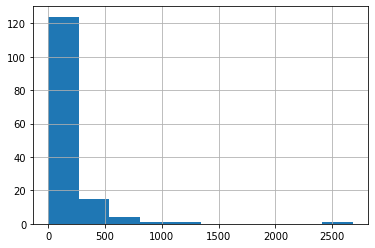

In [36]:
%matplotlib inline
df['Combined total'].hist(bins=10)

# Use a boolean mask

In [40]:
df['Combined total'] > 500

Afghanistan (AFG)                               False
Algeria (ALG)                                   False
Argentina (ARG)                                 False
Armenia (ARM)                                   False
Australasia (ANZ) [ANZ]                         False
                                                ...  
Yugoslavia (YUG) [YUG]                          False
Independent Olympic Participants (IOP) [IOP]    False
Zambia (ZAM) [ZAM]                              False
Zimbabwe (ZIM) [ZIM]                            False
Mixed team (ZZX) [ZZX]                          False
Name: Combined total, Length: 146, dtype: bool

We can use the above expression as an index to get a dataframe with the combined total > 500

In [41]:
df[df['Combined total'] > 500]

,# Summer,Gold,Silver,Bronze,Total,# Winter,Gold.1,Silver.1,Bronze.1,Total.1,# Games,Gold.2,Silver.2,Bronze.2,Combined total
China (CHN) [CHN],9,201,146,126,473,10,12,22,19,53,19,213,168,145,526
France (FRA) [O] [P] [Z],27,202,223,246,671,22,31,31,47,109,49,233,254,293,780
Germany (GER) [GER] [Z],15,174,182,217,573,11,78,78,53,209,26,252,260,270,782
East Germany (GDR) [GDR],5,153,129,127,409,6,39,36,35,110,11,192,165,162,519
Great Britain (GBR) [GBR] [Z],27,236,272,272,780,22,10,4,12,26,49,246,276,284,806
Italy (ITA) [M] [S],26,198,166,185,549,22,37,34,43,114,48,235,200,228,663
Russia (RUS) [RUS],5,132,121,142,395,6,49,40,35,124,11,181,161,177,519
Soviet Union (URS) [URS],9,395,319,296,1010,9,78,57,59,194,18,473,376,355,1204
Sweden (SWE) [Z],26,143,164,176,483,22,50,40,54,144,48,193,204,230,627
United States (USA) [P] [Q] [R] [Z],26,976,757,666,2399,22,96,102,84,282,48,1072,859,750,2681


You can use multiple conditions, using "OR = |", "AND = &"

In [42]:
at_least_one_gold = df[(df['Gold'] > 0) | (df['Gold.1'] > 0)]
at_least_one_gold.head()

,# Summer,Gold,Silver,Bronze,Total,# Winter,Gold.1,Silver.1,Bronze.1,Total.1,# Games,Gold.2,Silver.2,Bronze.2,Combined total
Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12
Australia (AUS) [AUS] [Z],25,139,152,177,468,18,5,3,4,12,43,144,155,181,480


In [43]:
only_winter_gold = df[(df['Gold.1'] > 0) & (df['Gold'] == 0)]
only_winter_gold

,# Summer,Gold,Silver,Bronze,Total,# Winter,Gold.1,Silver.1,Bronze.1,Total.1,# Games,Gold.2,Silver.2,Bronze.2,Combined total
Liechtenstein (LIE),16,0,0,0,0,18,2,2,5,9,34,2,2,5,9


# Indexing Dataframes

In [44]:
df = pd.read_csv('census.csv')
df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861


In [45]:
df['SUMLEV'].unique()

array([40, 50], dtype=int64)

In [48]:
df=df[df['SUMLEV'] == 50]  # get rid of the rows that are summaries at the state level "40"
df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411


In [49]:
columns_to_keep = ['STNAME',
                   'CTYNAME',
                   'BIRTHS2010',
                   'BIRTHS2011',
                   'BIRTHS2012',
                   'BIRTHS2013',
                   'BIRTHS2014',
                   'BIRTHS2015',
                   'POPESTIMATE2010',
                   'POPESTIMATE2011',
                   'POPESTIMATE2012',
                   'POPESTIMATE2013',
                   'POPESTIMATE2014',
                   'POPESTIMATE2015']
df = df[columns_to_keep]
df.head()

,STNAME,CTYNAME,BIRTHS2010,BIRTHS2011,BIRTHS2012,BIRTHS2013,BIRTHS2014,BIRTHS2015,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015
1,Alabama,Autauga County,151,636,615,574,623,600,54660,55253,55175,55038,55290,55347
2,Alabama,Baldwin County,517,2187,2092,2160,2186,2240,183193,186659,190396,195126,199713,203709
3,Alabama,Barbour County,70,335,300,283,260,269,27341,27226,27159,26973,26815,26489
4,Alabama,Bibb County,44,266,245,259,247,253,22861,22733,22642,22512,22549,22583
5,Alabama,Blount County,183,744,710,646,618,603,57373,57711,57776,57734,57658,57673


In [50]:
df = df.set_index(['STNAME', 'CTYNAME'])  # Multi-level indexing
df.head()

BIRTHS2010  BIRTHS2011  BIRTHS2012  BIRTHS2013  \
STNAME  CTYNAME                                                          
Alabama Autauga County         151         636         615         574   
        Baldwin County         517        2187        2092        2160   
        Barbour County          70         335         300         283   
        Bibb County             44         266         245         259   
        Blount County          183         744         710         646   

                        BIRTHS2014  BIRTHS2015  POPESTIMATE2010  \
STNAME  CTYNAME                                                   
Alabama Autauga County         623         600            54660   
        Baldwin County        2186        2240           183193   
        Barbour County         260         269            27341   
        Bibb County            247         253            22861   
        Blount County          618         603            57373   

                        POPESTIMATE2011  POPESTIMATE2012  POPESTIMATE2013  \
STNAME  CTYNAME                                                             
Alabama Autauga County            55253            55175            55038   
        Baldwin County           186659           190396           195126   
        Barbour County            27226            27159            26973   
        Bibb County               22733            22642            22512   
        Blount County             57711            57776            57734   

                        POPESTIMATE2014  POPESTIMATE2015  
STNAME  CTYNAME                                           
Alabama Autauga County            55290            55347  
        Baldwin County           199713           203709  
        Barbour County            26815            26489  
        Bibb County               22549            22583  
        Blount County             57658            57673

In [53]:
df.loc['Michigan', 'Washtenaw County']

BIRTHS2010            977
BIRTHS2011           3826
BIRTHS2012           3780
BIRTHS2013           3662
BIRTHS2014           3683
BIRTHS2015           3709
POPESTIMATE2010    345563
POPESTIMATE2011    349048
POPESTIMATE2012    351213
POPESTIMATE2013    354289
POPESTIMATE2014    357029
POPESTIMATE2015    358880
Name: (Michigan, Washtenaw County), dtype: int64

In [55]:
df.loc[ [('Alabama', 'Bibb County'),('Michigan', 'Washtenaw County'),
         ('Michigan', 'Wayne County')] ]

BIRTHS2010  BIRTHS2011  BIRTHS2012  BIRTHS2013  \
STNAME   CTYNAME                                                            
Alabama  Bibb County               44         266         245         259   
Michigan Washtenaw County         977        3826        3780        3662   
         Wayne County            5918       23819       23270       23377   

                           BIRTHS2014  BIRTHS2015  POPESTIMATE2010  \
STNAME   CTYNAME                                                     
Alabama  Bibb County              247         253            22861   
Michigan Washtenaw County        3683        3709           345563   
         Wayne County           23607       23586          1815199   

                           POPESTIMATE2011  POPESTIMATE2012  POPESTIMATE2013  \
STNAME   CTYNAME                                                               
Alabama  Bibb County                 22733            22642            22512   
Michigan Washtenaw County           349048           351213           354289   
         Wayne County              1801273          1792514          1775713   

                           POPESTIMATE2014  POPESTIMATE2015  
STNAME   CTYNAME                                             
Alabama  Bibb County                 22549            22583  
Michigan Washtenaw County           357029           358880  
         Wayne County              1766008          1759335

# Missing values

In [ ]:
df = pd.read_csv('log.csv')
df

In [ ]:
df = df.set_index('time')
df = df.sort_index()
df

In [ ]:
df = df.reset_index()
df = df.set_index(['time', 'user'])
df

In [ ]:
df.fillna?

In [ ]:
df = df.fillna(method='ffill')
df